__(a)__ Decision boundary in the perceptron algorithm can be found by the following equation: <br> $\mathbf{w}^\intercal \mathbf{x} = 0 \Longrightarrow w_{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} = 0 \Longrightarrow x_{2} = -\dfrac{w_{1}}{w_{2}}x_{1} - \dfrac{w_{0}}{w_{2}}$ <br>
$\Longrightarrow a = -\dfrac{w_{1}}{w_{2}}$ and $b = -\dfrac{w_{0}}{w_{2}}$



In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# target function f
f = lambda x : -2*x + 3

l = -50   # low limit
h = 0     # high limit

# setting axis range for the target function f
x_axis, y_axis = [l, h], [f(l), f(h)]


def plot_target_function():
    plt.plot(x_axis, y_axis, color = 'black', label = 'target function')


def data_generation(data_size):
    np.random.seed(100)

    # x: input vector
    # y: output vector
    x1 = np.random.uniform(low = l, high = h, size=data_size)
    x2 = np.random.uniform(low = f(h), high = f(l), size=data_size)
    y = np.zeros(data_size)

    for i, (point_x1, point_x2) in enumerate(zip(x1, x2)):
        if point_x2 < f(point_x1):
            plt.scatter(point_x1, point_x2, color = 'b', marker = 'o')
            y[i] = -1
        elif point_x2 > f(point_x1):
            plt.scatter(point_x1, point_x2, color = 'r', marker = 'x')
            y[i] = +1
        else:
            plt.scatter(point_x1, point_x2, color = 'black')
            
    return x1, x2, y
            

__(b)__ We chose $f(x) = -2x + 3 $ as our target function and uniformly generated the data points in the range of -50 and 0. If a data point is under the target function it is labeled as -1 (blue - round), if it is above the target function then it is labeled as +1 (red - cross).

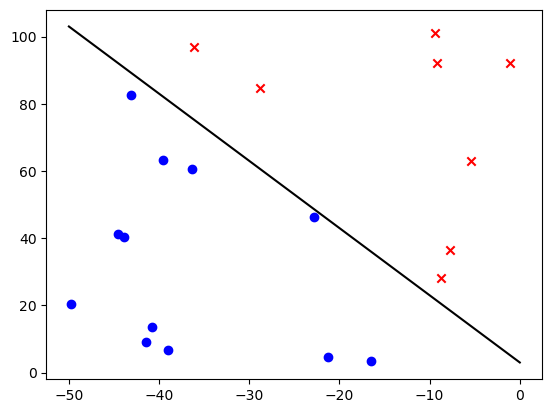

In [18]:
# target function and a data set of size 20
plot_target_function()
x1, x2, y = data_generation(20)

In [19]:
def perceptron_learning_algorithm(data_size, x1, x2, y):
    # initial parameters
    w = np.zeros(3)
    update_no = 0
    
    while True:
        misclassified = False
        for i in range(data_size):
            x = np.array([1, x1[i], x2[i]])
            if y[i]*(np.dot(w, x)) <= 0:
                w = w + y[i]*x
                misclassified = True
                break
            
        if misclassified == False:
            break
        
        update_no+=1
        
    
    g = lambda x : -w[1]*x/w[2] - w[0]/w[2]
    y_learned_axis = [g(l), g(h)]
    
    # plotting the predicted target function
    plt.plot(x_axis, y_learned_axis, color = 'green', label = 'learned function')
    print(f"Number of updates that the algorithm takes before converging: {update_no}")

__(c)__ Above we implemented the perceptron algorithm from scratch. It takes size of the data that will be classified, input feature vectors $x_{1}$, $x_{2}$ and the outputs $y$. Additionally, since the $x_{0}$ values of each input vector are 1, we prepended those values at the beginning of the input vectors in the algorithm. <br> <br>
In the plot below, black line represents the target function and green line represents the decision boundary that our perceptron algorithm has generated. <br> <br>
As it can clearly be seen they are quite close to each other. However, it is obvious that they are not quite the same.

Number of updates that the algorithm takes before converging: 3


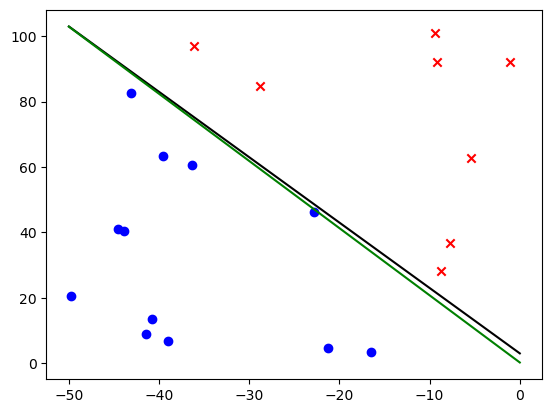

In [20]:
# perceptron learning algorithm with a data set of size 20
plot_target_function()
x1, x2, y = data_generation(20)
perceptron_learning_algorithm(20, x1, x2, y)

__(d)__ We repeated everything in (c) with the data size 1000 instead of 20. This time, our data points are placed more compactly due to the drastic increase in the data size. As this increases the convergence success of our algorithm, we see that the target function and the decision boundary become almost inseparable.  <br> <br>

The reason for this phenomenon is that the data points we generated are placed so compactly that the slope of our decision boundary could take values in a very narrow interval. This made the decision boundary and the target function look very similar and significantly increased the convergence time.

Number of updates that the algorithm takes before converging: 19173


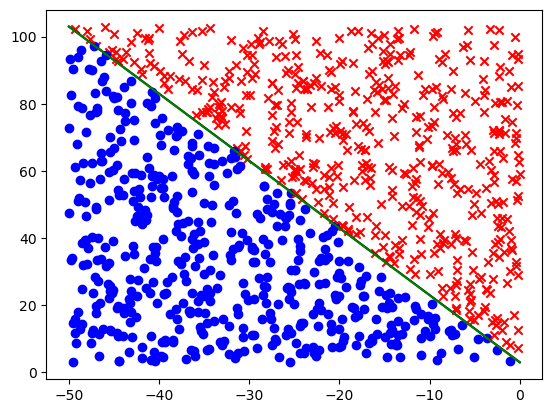

In [21]:
# perceptron learning algorithm with a data set of size 1000
plot_target_function()
x1, x2, y = data_generation(1000)
perceptron_learning_algorithm(1000, x1, x2, y)